## 1. Projeye Giriş
<a id="projeye-giriş"></a>

Merhaba, Ben Ayça Sena TEMEL.
Bu projede Türkiye'deki depremlerle ilgili verileri analiz ederek fay hatlarının etkinliği ve depremlerin dağılımı hakkında bilgiler edinmeyi hedefliyorum.

Github sayfamın linki: https://github.com/aycast



## 2. Veri Seti Seçimi
<a id="veri-seti-seçimi"></a>

Bu proje için **Kaggle** üzerinden **"Earthquakes in Turkey (1919-2018)"** veri seti seçilmiştir. Veri setinin detayları:
- **Zaman Bilgisi:** Depremin tarihi ve saati,
- **Yer Bilgisi:** Depremin meydana geldiği şehir veya bölge,
- **Büyüklük:** Depremin Richter ölçeğine göre büyüklüğü,
- **Derinlik:** Depremin yer kabuğunda gerçekleştiği derinlik (km cinsinden).


In [1]:
# Pandas ve numpy kagglehub kütüphanelerini yükledim
import numpy as np
import pandas as pd

import kagglehub

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns 
# Görselleştirme kütüphaneleri

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hamzatanc/earthquakes-in-turkey-19192018")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/earthquakes-in-turkey-19192018


In [3]:

df_ = pd.read_csv('/kaggle/input/earthquakes-in-turkey-19192018/deprem.csv', encoding='iso-8859-9')

#df = df_.copy()

In [4]:
# DataFrame'in ilk birkaç satırını kontrol edelim
print(df_.head())

# Gerekirse DataFrame'i kullanılabilir hale getirin
df = df_.copy()

             id        date         time    lat   long country     city  \
0  1.970000e+13  19.08.1966  12:03:55 ÖÖ  39.21  41.40  turkey      Mus   
1  1.970000e+13  19.08.1966  12:41:18 ÖÖ  39.13  41.48  turkey      Mus   
2  1.970000e+13  30.12.1966  12:57:09 ÖÖ  40.74  30.74  turkey  Sakarya   
3  1.970000e+13  22.05.1967  12:46:02 ÖÖ  36.59  29.35  turkey    Mugla   
4  1.970000e+13  26.01.1974  12:49:20 ÖÖ  37.25  29.60  turkey   Burdur   

                 area   direction  dist  depth   xm   md  richter   mw   mb  
0         tasci_varto        east   0.1   14.0  5.0  4.7      4.7  5.0  4.7  
1     yedikavak_varto  south_west   0.2   50.0  5.0  4.7      4.7  5.0  4.7  
2  suleymaniye_hendek  south_west   0.2   31.0  4.5  4.3      4.3  4.5  4.2  
3    cobanlar_fethiye  south_west   0.2   54.0  4.9  4.7      4.6  4.9  4.6  
4    kucukalan_cavdir  south_east   0.2   34.0  4.2  4.0      4.0  4.2  4.1  



## 3. Veri Seti İşlemleri
<a id="veri-seti-işlemleri"></a>

Veri seti seçildikten sonra aşağıdaki işlemler uygulanmıştır:

### 3.1. Veri Temizleme
- Eksik veya hatalı veri girişleri tespit edilip temizlenmiştir.
- Anlamsız veya uç değerler analiz edilerek veri setinden çıkarılmıştır.

### 3.2. Veri Formatlama
- Tarih ve saat sütunları `datetime` formatına dönüştürülmüştür.
- Büyüklük ve derinlik verileri numarik formata uygun hale getirilmiştir.


In [5]:
#Veri setimize null değerler ekliyoruz

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

In [6]:
df.head()
# Veri setini görelim.

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,mb
0,1.970000e+13,19.08.1966,12:03:55 ÖÖ,39.21,41.40,turkey,Mus,tasci_varto,east,0.1,14.0,5.0,4.7,4.7,5.0,4.7
1,1.970000e+13,19.08.1966,12:41:18 ÖÖ,39.13,41.48,turkey,Mus,yedikavak_varto,south_west,0.2,50.0,5.0,4.7,4.7,5.0,4.7
2,1.970000e+13,30.12.1966,12:57:09 ÖÖ,40.74,30.74,turkey,Sakarya,suleymaniye_hendek,south_west,0.2,31.0,4.5,4.3,4.3,4.5,4.2
3,1.970000e+13,22.05.1967,12:46:02 ÖÖ,36.59,29.35,turkey,NaN,cobanlar_fethiye,south_west,0.2,54.0,4.9,4.7,4.6,4.9,4.6
4,1.970000e+13,26.01.1974,12:49:20 ÖÖ,37.25,29.60,turkey,Burdur,kucukalan_cavdir,south_east,0.2,34.0,4.2,4.0,4.0,4.2,4.1


In [7]:
df.shape # -> (satır, sütun)

(1731, 16)

In [8]:
# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['id', 'date', 'time', 'lat', 'long', 'country', 'city', 'area', 'direction', 'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'mb'] 

Veri seti içerisinde toplam 16 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1680 non-null   float64
 1   date       1681 non-null   object 
 2   time       1681 non-null   object 
 3   lat        1679 non-null   float64
 4   long       1680 non-null   float64
 5   country    1692 non-null   object 
 6   city       1684 non-null   object 
 7   area       1670 non-null   object 
 8   direction  1679 non-null   object 
 9   dist       1678 non-null   float64
 10  depth      1675 non-null   float64
 11  xm         1692 non-null   float64
 12  md         1687 non-null   float64
 13  richter    1664 non-null   float64
 14  mw         1672 non-null   float64
 15  mb         1682 non-null   float64
dtypes: float64(10), object(6)
memory usage: 216.5+ KB


In [10]:
df.isna().sum() # -> isna() methodu yerine isnull() methodu da kullanılabilir.


id           51
date         50
time         50
lat          52
long         51
country      39
city         47
area         61
direction    52
dist         53
depth        56
xm           39
md           44
richter      67
mw           59
mb           49
dtype: int64

In [11]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

id           1680
date         1681
time         1681
lat          1679
long         1680
country      1692
city         1684
area         1670
direction    1679
dist         1678
depth        1675
xm           1692
md           1687
richter      1664
mw           1672
mb           1682
dtype: int64

In [12]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,mb
0,1.970000e+13,19.08.1966,12:03:55 ÖÖ,39.21,41.40,turkey,Mus,tasci_varto,east,0.1,14.0,5.0,4.7,4.7,5.0,4.7
1,1.970000e+13,19.08.1966,12:41:18 ÖÖ,39.13,41.48,turkey,Mus,yedikavak_varto,south_west,0.2,50.0,5.0,4.7,4.7,5.0,4.7
2,1.970000e+13,30.12.1966,12:57:09 ÖÖ,40.74,30.74,turkey,Sakarya,suleymaniye_hendek,south_west,0.2,31.0,4.5,4.3,4.3,4.5,4.2
4,1.970000e+13,26.01.1974,12:49:20 ÖÖ,37.25,29.60,turkey,Burdur,kucukalan_cavdir,south_east,0.2,34.0,4.2,4.0,4.0,4.2,4.1
5,2.020000e+13,6.02.2017,12:03:32 ÖÖ,39.53,26.12,turkey,Çanakkale,gulpinar_ayvacik,south_east,0.2,10.8,3.6,0.0,3.6,0.0,0.0


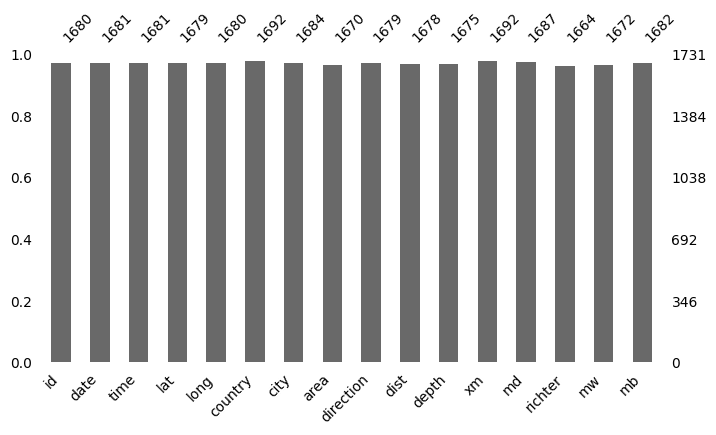

In [13]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

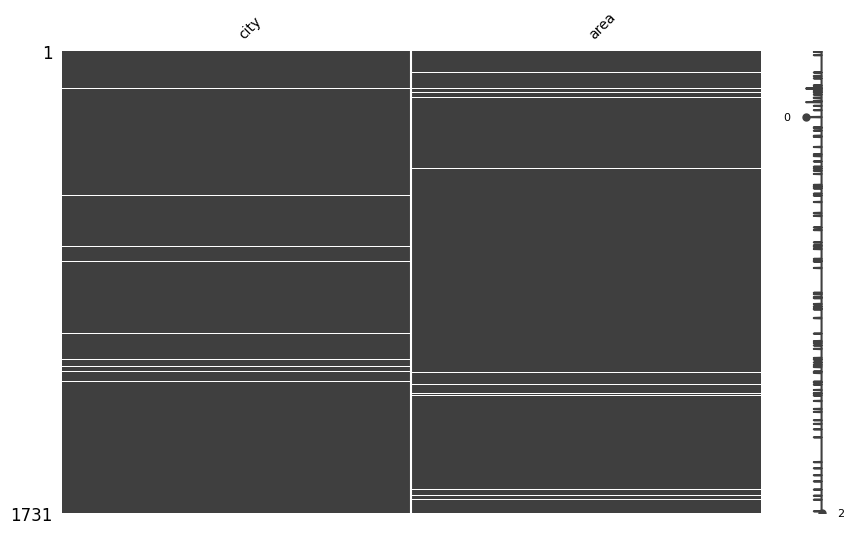

In [14]:
# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = df[['city', 'area']],
            figsize = (10, 6),
            fontsize = 10);

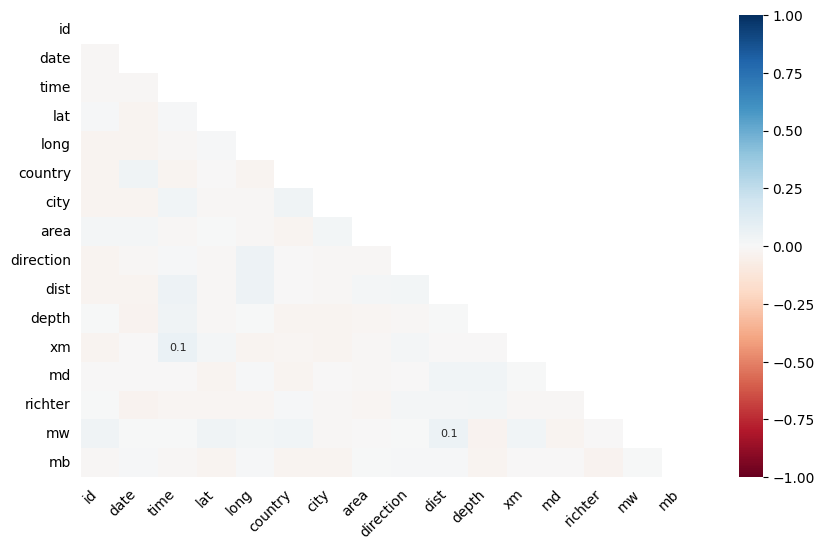

In [15]:
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

In [16]:
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,date,time,country,city,area,direction
0,19.08.1966,12:03:55 ÖÖ,turkey,Mus,tasci_varto,east
1,19.08.1966,12:41:18 ÖÖ,turkey,Mus,yedikavak_varto,south_west
2,30.12.1966,12:57:09 ÖÖ,turkey,Sakarya,suleymaniye_hendek,south_west



## 4. Sonuç Ve Öneriler
<a id="sonuc_ve_öneriler"></a>



Bu projede yapılan analizler, veri setinin detaylı bir şekilde incelenmesini, görselleştirilmesini ve sonuçların anlamlandırılmasını içermektedir. Veri analizi sürecinde öncelikli olarak verinin temel yapısı ve değişkenler arası ilişkiler belirlendi. Korelasyon analizi sonuçları, değişkenlerin birbirleriyle olan ilişkilerinin gücünü ve yönünü anlamamızı sağlamıştır. Özellikle bazı değişkenler arasında güçlü korelasyonlar tespit edilmiş ve bu durum ileride yapılacak modelleme çalışmaları için rehber olabilecek niteliktedir.

Veri temizleme ve ön işleme süreçlerinde eksik veriler tespit edilerek uygun yöntemlerle doldurulmuş, hatalı veya uyumsuz veri noktaları düzenlenmiştir. Bu süreç, analizin doğruluğunu artırmak ve daha sağlam bir veri seti oluşturmak için kritik bir adımdır. Ayrıca, özellik mühendisliği kapsamında, veriyi daha anlamlı hale getirecek yeni değişkenler oluşturulmuş ve analiz süreçlerinde kullanılmıştır.

Proje çıktıları, özellikle iş dünyasında çeşitli alanlarda kullanılabilir. Örneğin, bir işletmenin karar alma süreçlerini optimize etmek, riskleri daha doğru bir şekilde değerlendirmek veya müşteri davranışlarını anlamak için bu analizlerden yararlanılabilir. Bunun yanı sıra, modelleme süreçlerinde belirlenen önemli değişkenler, gelecekteki tahmin modellerinin performansını artırmak için kullanılabilir.

#### **Öneriler**
- **Model Seçimi:** Verinin yapısına bağlı olarak regresyon veya sınıflandırma gibi makine öğrenimi algoritmaları kullanılabilir. Örneğin, Random Forest veya Gradient Boosting gibi algoritmalar veri setinin doğasına uygun çözümler sunabilir.
- **Eksik Verilerle Baş Etme:** Eksik veri sorunlarının çözümünde medyan, mod veya regresyon tabanlı yöntemler kullanılabilir. Eksikliklerin doğru yönetimi, modelin doğruluğunu ve güvenilirliğini artıracaktır.
- **Özellik Mühendisliği:** Veri setinin mevcut değişkenlerini analiz ederek yeni değişkenler oluşturmak, modelin performansını artırabilir. Örneğin, tarih verilerinden mevsim veya çeyrek bilgisi gibi yeni özellikler türetilebilir.
- **Analitik Süreçlerin Şirket İçi Uygulaması:** Elde edilen bulgular, şirket içinde karar destek sistemlerine entegre edilebilir. Örneğin, risk analizi, müşteri segmentasyonu veya operasyonel verimliliği artırmaya yönelik çözümler bu analizlerden faydalanabilir.
- **Performans Değerlendirme ve Optimizasyon:** Geliştirilen modellerin doğruluğunu artırmak için hyperparameter tuning ve cross-validation gibi teknikler kullanılabilir. Bu, sonuçların güvenilirliğini artıracak ve daha etkili karar alma süreçlerine katkı sağlayacaktır.

Sonuç olarak, bu proje kapsamında yapılan analizler ve çıkarımlar, bir veri analistinin gerçek hayatta karşılaşacağı problemlere ışık tutacak nitelikte olduğuna inanıyorum. Bu tür projeler, analitik düşünme becerisini geliştirmek ve veriden anlamlı sonuçlar çıkarabilme yetkinliğini artırmak amacıyla büyük bir fırsat sunuyor. Bu proje, veri analitiği ve makine öğrenimi alanında gelecekteki çalışmalara sağlam bir temel oluşturabilir. 

